Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Leemos el dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
#Comprobamos cuantas filas y columnas tiene
df.shape

(2443651, 9)

In [4]:
#Tipos de variables de las columnas del dataset
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

Part 1: Understanding Product Categories

1. Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

In [5]:
# Genero tabla de frecuencias para category
frequency_table = df['category'].value_counts()


In [6]:
#Indentifico las top 5 categorias
top_5_categories = frequency_table.head(5)

print('Top 5 most listed product categories:')
top_5_categories

Top 5 most listed product categories:


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

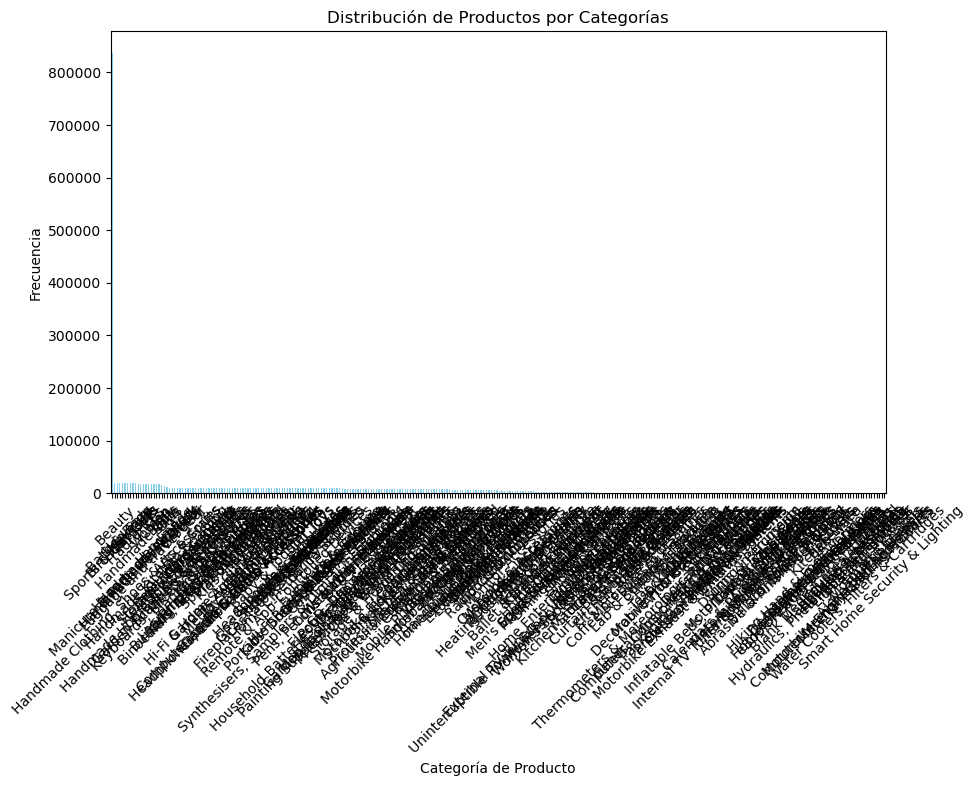

In [7]:
#Bar Chart
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Distribución de Productos por Categorías')
plt.xlabel('Categoría de Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

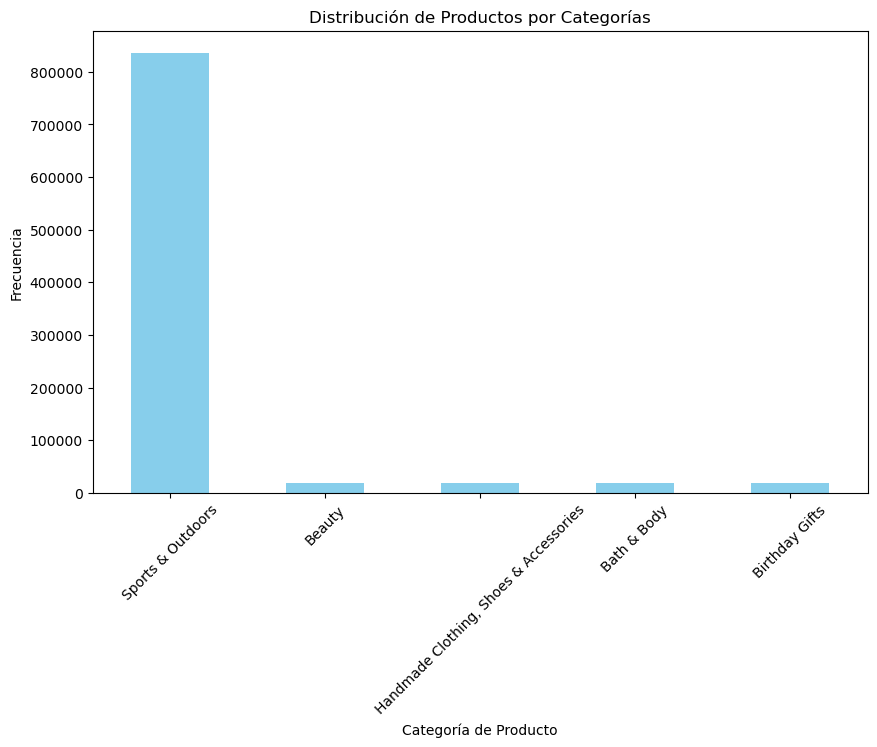

In [19]:
#Bar Chart top 5 categories
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar', color='skyblue')
plt.title('Distribución de Productos por Categorías')
plt.xlabel('Categoría de Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

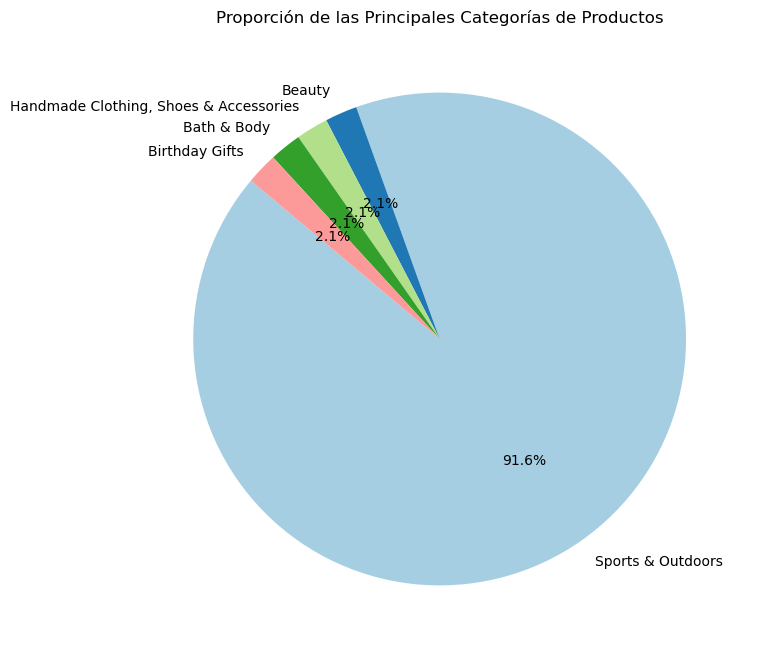

In [8]:
#Pie Chart top 5 categorias
plt.figure(figsize=(8, 8))
top_5_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporción de las Principales Categorías de Productos')
plt.ylabel('')
plt.show()

Part 2: Delving into Product Pricing

1. Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [9]:
#Calculos estadisticos
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [10]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print('mean:', mean_price)
print('median:', median_price)
print('mode:', mode_price)

mean: 89.24380943923663
median: 19.09
mode: 9.99


La media es mucho más alta que la mediana y la moda. Esto sugiere que puede haber algunos precios muy altos que están inflando la media, mientras que la mayoría de los precios están concentrados en valores más bajos, como se refleja en la mediana y la moda.

2. Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

In [11]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
price_range = df['price'].max() - df['price'].min()
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


print("Variance of product prices:", variance_price)
print("Standard deviation of product prices:", std_dev_price)
print("Range of product prices:", price_range)
print("Interquartile range of product prices:", IQR)

Variance of product prices: 119445.4853225653
Standard deviation of product prices: 345.6088617535223
Range of product prices: 100000.0
Interquartile range of product prices: 36.0


La alta varianza y desviación estandar indican una considerable dispersión en los precios.

3. Visualizations:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

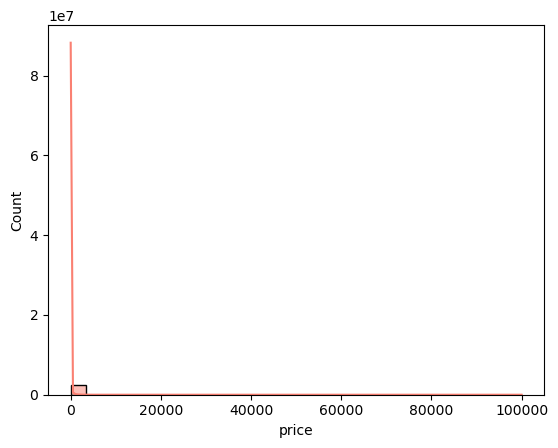

In [12]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

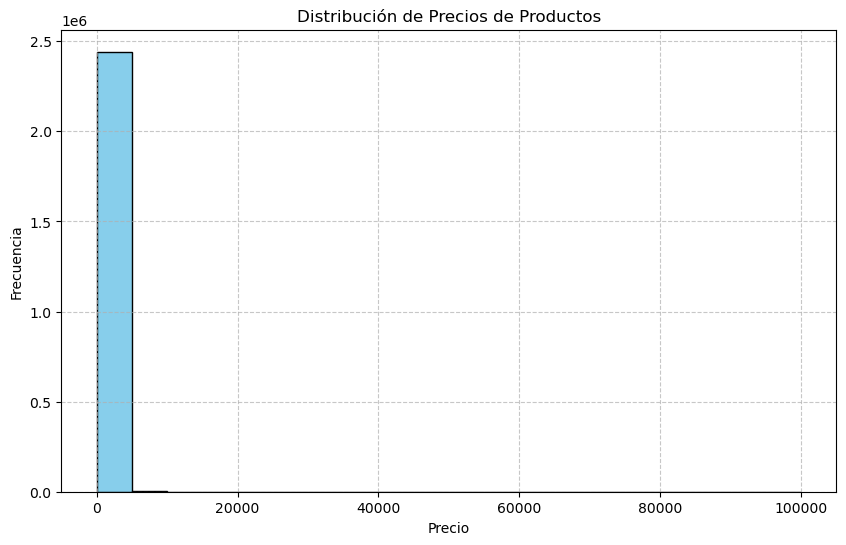

In [13]:
#Histograma
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

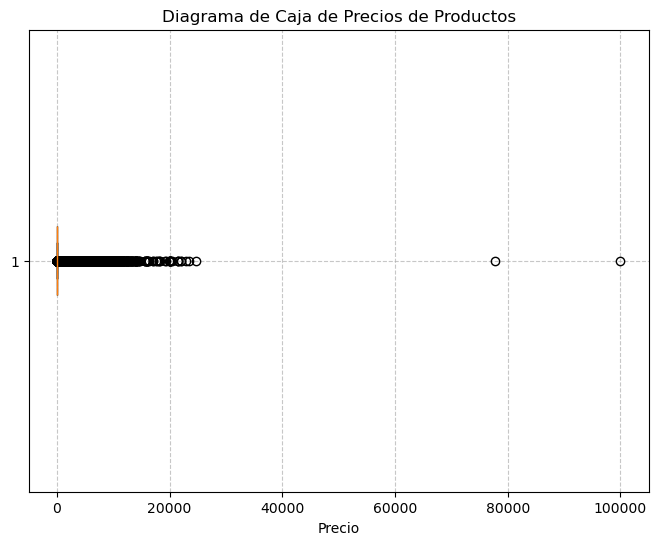

In [14]:
#Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Diagrama de Caja de Precios de Productos')
plt.xlabel('Precio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Part 3: Unpacking Product Ratings

1. Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [15]:
# Calcula la media, mediana y moda para rating of products
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]  


print("mean rating of products:", mean_rating)
print("median rating of products:", median_rating)
print("mode rating of products:", mode_rating)



mean rating of products: 2.152836472966065
median rating of products: 0.0
mode rating of products: 0.0


Hay una tendencia hacia calificaciones bajas, con un número significativo de productos no calificados o calificados muy bajo.

2. Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [16]:
# Calcula la varianza, desviación estándar y rango intercuartil 
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
IQR_rating = Q3 - Q1


print("variance rating of products:", variance_rating)
print("desviation standard rating of products:", std_dev_rating)
print("range rating of products:", IQR_rating)


variance rating of products: 4.81743402976196
desviation standard rating of products: 2.1948653785054697
range rating of products: 4.4


Las calificaciones de los productos muestran una variabilidad considerable, con calificaciones dispersas en un rango amplio.

3. Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [17]:
from scipy.stats import skew, kurtosis

# Calcula el sesgo y la curtosis 
skewness_rating = skew(df['stars'])
kurtosis_rating = kurtosis(df['stars'])

print("skewness:", skewness_rating)
print("kurtosis:", kurtosis_rating)

skewness: 0.08120730776283354
kurtosis: -1.926004642549839


Las calificaciones están sesgadas hacia la derecha (cola larga en el lado derecho), lo que sugiere que hay una tendencia hacia valores más bajos

4. Visualizations:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


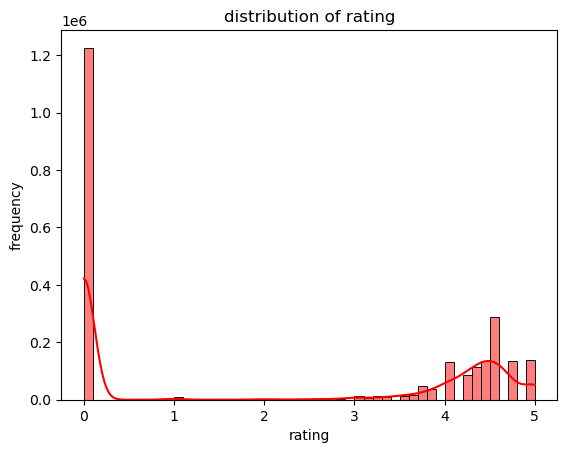

In [18]:
sns.histplot(df.stars, kde=True, bins=50, color="red")
plt.xlabel('rating')
plt.ylabel('frequency')
plt.title('distribution of rating')
plt.show()